In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import xml.etree.ElementTree as ET

In [2]:
filter_rbps = pd.read_csv('results/tomtom_results/Filters_motifs_filter_pwms.meme_res/tomtom.tsv', sep='\t')
# remove nan values
filter_rbps = filter_rbps.dropna()
filter_rbps

,Query_ID,Target_ID,Optimal_offset,p-value,E-value,q-value,Overlap,Query_consensus,Target_consensus,Orientation
0,filter_0,RNCMPT00287,-1.0,0.001799,0.439004,0.439004,7.0,UGACUACU,UACUACG,+
1,filter_0,RNCMPT00073,-1.0,0.008466,2.065820,0.999985,7.0,UGACUACU,GACGACGG,+
2,filter_0,RNCMPT00061,-2.0,0.032716,7.982630,0.999985,6.0,UGACUACU,ACGACGA,+
3,filter_1,RNCMPT00052,1.0,0.002857,0.697075,0.260186,6.0,CGCGGCGG,GCGCGGG,+
4,filter_1,RNCMPT00162,-2.0,0.004025,0.982147,0.260186,6.0,CGCGGCGG,CGGAGGA,+
...,...,...,...,...,...,...,...,...,...,...
1535,filter_127,RNCMPT00086,-1.0,0.035705,8.711930,0.487443,7.0,UGUGGUGU,UUUGUUU,+
1536,filter_127,RNCMPT00117,0.0,0.035705,8.711930,0.487443,7.0,UGUGGUGU,UUUGUUU,+
1537,filter_127,RNCMPT00121,0.0,0.035705,8.711930,0.487443,7.0,UGUGGUGU,UUUGUUU,+
1538,filter_127,RNCMPT00270,-1.0,0.035705,8.711930,0.487443,7.0,UGUGGUGU,UGUGUGU,+


In [3]:
# # remove non significant filter rbps, based on q-value and p-value
# filter_rbps = filter_rbps[filter_rbps['q-value'] < 0.1]
# filter_rbps = filter_rbps[filter_rbps['p-value'] < 0.01]
# filter_rbps

In [4]:
filters_imp = pd.read_csv('filter_importance_128_by_160.csv', index_col=0)
filters_imp

,0,1,2,3,4,5,6,7,8,9,...,150,151,152,153,154,155,156,157,158,159
filter_0,0.000409,0.000389,0.000389,0.000389,0.000397,0.000384,0.000386,0.000381,0.000387,0.000388,...,0.000383,0.000381,0.000394,0.000379,0.000392,0.000381,0.000398,0.000390,0.000386,0.000382
filter_1,0.000009,0.000012,0.000010,0.000011,0.000011,0.000012,0.000010,0.000010,0.000013,0.000012,...,0.000010,0.000010,0.000009,0.000008,0.000009,0.000009,0.000014,0.000013,0.000010,0.000008
filter_2,0.000005,0.000005,0.000003,0.000005,0.000003,0.000005,0.000006,0.000004,0.000004,0.000004,...,0.000004,0.000004,0.000003,0.000002,0.000003,0.000004,0.000004,0.000004,0.000005,0.000003
filter_3,0.000074,0.000073,0.000069,0.000064,0.000066,0.000066,0.000069,0.000066,0.000070,0.000062,...,0.000063,0.000068,0.000064,0.000054,0.000065,0.000060,0.000066,0.000062,0.000066,0.000064
filter_4,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,...,0.000002,0.000002,0.000002,0.000002,0.000002,0.000002,0.000003,0.000002,0.000002,0.000002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
filter_123,0.000031,0.000022,0.000024,0.000021,0.000024,0.000023,0.000023,0.000027,0.000021,0.000018,...,0.000023,0.000026,0.000023,0.000018,0.000023,0.000029,0.000026,0.000024,0.000026,0.000029
filter_124,0.000344,0.000285,0.000295,0.000291,0.000296,0.000294,0.000291,0.000295,0.000286,0.000285,...,0.000291,0.000290,0.000288,0.000296,0.000295,0.000297,0.000300,0.000294,0.000287,0.000339
filter_125,0.000009,0.000010,0.000011,0.000010,0.000011,0.000012,0.000010,0.000012,0.000011,0.000009,...,0.000012,0.000009,0.000009,0.000009,0.000010,0.000008,0.000012,0.000011,0.000008,0.000010
filter_126,0.000060,0.000059,0.000047,0.000058,0.000058,0.000054,0.000055,0.000055,0.000052,0.000048,...,0.000050,0.000056,0.000056,0.000041,0.000052,0.000049,0.000057,0.000051,0.000056,0.000052


In [5]:
# Parse HTML file using BeautifulSoup
with open("results/tomtom_results/Filters_motifs_filter_pwms.meme_res/tomtom.html") as f:
    soup = BeautifulSoup(f, "html.parser")

import xml.etree.ElementTree as ET

# Replace the file path with the path to your XML file
xml_file = "results/tomtom_results/Filters_motifs_filter_pwms.meme_res/tomtom.xml"
# Replace the file path with the path to your XML file

# Parse the XML file
tree = ET.parse(xml_file)

# Find all the <motif> elements
motif_elements = tree.findall('.//motif')

# Extract the 'id' and 'alt' attributes and print them
rbp_map = {}
for motif in motif_elements:
    motif_id = motif.get('id')
    motif_alt = motif.get('alt')
    if motif_alt:
        rbp_map[motif_id] = motif_alt


filter_rbps_dict = {}
for index, row in filter_rbps.iterrows():
    if row['Query_ID'] in filter_rbps_dict:
        filter_rbps_dict[row['Query_ID']].append(row['Target_ID'])
    else:
        filter_rbps_dict[row['Query_ID']] = [row['Target_ID']]
filter_rbps_dict
for key, value in filter_rbps_dict.items():
    filter_rbps_dict[key] = list(set([rbp_map[x] for x in value]))
filter_rbps_dict


{'filter_0': ['An_0287', 'SRSF7', 'RSF1'],
 'filter_1': ['B52',
  'ZC3H10',
  'CG33714',
  'SRSF7',
  'PPRC1',
  'LIN28A',
  'RBM4',
  'SRSF1',
  'LARK'],
 'filter_2': ['U2AF2',
  'Tb_0220',
  'RALY',
  'TIA1',
  'ZC3H14',
  'SXL',
  'PFI1435w',
  'PAPI',
  'ETR-1',
  'BRUNOL4',
  'Pp_0228',
  'U2AF50',
  'Pp_0229',
  'Tb_0217',
  'Tv_0236',
  'HuR',
  'EXC-7',
  'Smp_067420',
  'ELAV',
  'RBP9',
  'CPEB2',
  'ARET',
  'Ot_0262',
  'CPEB4',
  'PTBP1',
  'BRUNOL5',
  'FNE',
  'Tv_0258',
  'TIAR-1',
  'HNRNPCL1',
  'TIAR-3',
  'HNRNPC'],
 'filter_3': ['YBX1',
  'Sf3b4',
  'An_0265',
  'PF13_0315',
  'PUM',
  'RBM45',
  'MAL8P1.40',
  'Pp_0206'],
 'filter_4': ['TUT1',
  'Tb_0251',
  'PABP',
  'IGF2BP2',
  'RBMS1',
  'Tb_0219',
  'Rbm42',
  'MAL13P1.35',
  'RBM41',
  'IGF2BP3'],
 'filter_6': ['BRU-3',
  'RALY',
  'TIA1',
  'ZC3H14',
  'RBM38',
  'SFPQ',
  'PAPI',
  'PFI1435w',
  'ETR-1',
  'BRUNOL4',
  'CG7903',
  'Tb_0217',
  'Rbm38',
  'ORB2',
  'HuR',
  'ELAV',
  'ARET',
  'BRUNOL6',
  

In [6]:
beforecorrection  = ['HNRPLL', 'HuR', 'HNRNPA1','BRUNOL6', 'Nab2p','BRUNOL4', 'BRUNOL5']
corrected_names = ['HNRNPLL', 'ELAVL1', 'HNRNPA1','CELF6', 'NAB2', 'CELF4', 'CELF5']
# lets change the filter_rbps_dict values to corrected names,
for key, value in filter_rbps_dict.items():
    for i, rbp in enumerate(value):
        if rbp in beforecorrection:
            value[i] = corrected_names[beforecorrection.index(rbp)]

In [7]:
# Initialize an empty list to store data
new_data = []

# Iterate over each filter
for filter_name, rbps in filter_rbps_dict.items():
    # Get the importance scores for the current filter
    imp_scores = filters_imp.loc[filter_name]
    # For each RBP that binds to this filter, duplicate the importance scores
    for rbp in rbps:
        row_data = imp_scores.to_dict()
        row_data['RBP'] = rbp
        new_data.append(row_data)

# Create the new dataframe
new_df = pd.DataFrame(new_data)

# Reorder columns to have 'RBP' as the first column
cols = ['RBP'] + [col for col in new_df.columns if col != 'RBP']
new_df = new_df[cols]

# Now new_df contains the importance scores duplicated for each RBP that binds to each filter
new_df


,RBP,0,1,2,3,4,5,6,7,8,...,150,151,152,153,154,155,156,157,158,159
0,An_0287,0.000409,0.000389,0.000389,0.000389,0.000397,0.000384,0.000386,0.000381,0.000387,...,0.000383,0.000381,0.000394,0.000379,0.000392,0.000381,0.000398,0.000390,0.000386,0.000382
1,SRSF7,0.000409,0.000389,0.000389,0.000389,0.000397,0.000384,0.000386,0.000381,0.000387,...,0.000383,0.000381,0.000394,0.000379,0.000392,0.000381,0.000398,0.000390,0.000386,0.000382
2,RSF1,0.000409,0.000389,0.000389,0.000389,0.000397,0.000384,0.000386,0.000381,0.000387,...,0.000383,0.000381,0.000394,0.000379,0.000392,0.000381,0.000398,0.000390,0.000386,0.000382
3,B52,0.000009,0.000012,0.000010,0.000011,0.000011,0.000012,0.000010,0.000010,0.000013,...,0.000010,0.000010,0.000009,0.000008,0.000009,0.000009,0.000014,0.000013,0.000010,0.000008
4,ZC3H10,0.000009,0.000012,0.000010,0.000011,0.000011,0.000012,0.000010,0.000010,0.000013,...,0.000010,0.000010,0.000009,0.000008,0.000009,0.000009,0.000014,0.000013,0.000010,0.000008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,ZC3H14,0.000274,0.000225,0.000213,0.000216,0.000221,0.000213,0.000215,0.000226,0.000212,...,0.000212,0.000222,0.000216,0.000204,0.000215,0.000216,0.000222,0.000214,0.000213,0.000256
1335,UNC-75,0.000274,0.000225,0.000213,0.000216,0.000221,0.000213,0.000215,0.000226,0.000212,...,0.000212,0.000222,0.000216,0.000204,0.000215,0.000216,0.000222,0.000214,0.000213,0.000256
1336,ELAVL1,0.000274,0.000225,0.000213,0.000216,0.000221,0.000213,0.000215,0.000226,0.000212,...,0.000212,0.000222,0.000216,0.000204,0.000215,0.000216,0.000222,0.000214,0.000213,0.000256
1337,RBM38,0.000274,0.000225,0.000213,0.000216,0.000221,0.000213,0.000215,0.000226,0.000212,...,0.000212,0.000222,0.000216,0.000204,0.000215,0.000216,0.000222,0.000214,0.000213,0.000256


In [8]:
filter_rbps_dict['filter_0']

['An_0287', 'SRSF7', 'RSF1']

In [9]:
new_df[new_df['RBP']=='ELAVL1']

,RBP,0,1,2,3,4,5,6,7,8,...,150,151,152,153,154,155,156,157,158,159
27,ELAVL1,0.000005,0.000005,0.000003,0.000005,0.000003,0.000005,0.000006,0.000004,0.000004,...,0.000004,0.000004,0.000003,0.000002,0.000003,0.000004,0.000004,0.000004,0.000005,0.000003
76,ELAVL1,0.000425,0.000408,0.000412,0.000410,0.000417,0.000409,0.000408,0.000405,0.000408,...,0.000408,0.000404,0.000414,0.000407,0.000413,0.000407,0.000416,0.000411,0.000410,0.000409
119,ELAVL1,0.000103,0.000092,0.000086,0.000089,0.000091,0.000089,0.000089,0.000093,0.000086,...,0.000086,0.000090,0.000088,0.000081,0.000086,0.000091,0.000091,0.000089,0.000090,0.000097
286,ELAVL1,0.000385,0.000358,0.000358,0.000359,0.000362,0.000358,0.000357,0.000360,0.000356,...,0.000359,0.000358,0.000360,0.000356,0.000359,0.000361,0.000365,0.000359,0.000359,0.000376
340,ELAVL1,0.000355,0.000359,0.000350,0.000350,0.000347,0.000350,0.000345,0.000346,0.000359,...,0.000341,0.000340,0.000353,0.000326,0.000346,0.000328,0.000338,0.000335,0.000346,0.000323
416,ELAVL1,0.000224,0.000208,0.000213,0.000209,0.000221,0.000207,0.000209,0.000206,0.000210,...,0.000211,0.000206,0.000213,0.000207,0.000215,0.000212,0.000224,0.000215,0.000208,0.000207
476,ELAVL1,0.000058,0.000052,0.000043,0.000051,0.000052,0.000048,0.000048,0.000049,0.000046,...,0.000046,0.000050,0.000048,0.000040,0.000047,0.000048,0.000052,0.000048,0.000049,0.000051
508,ELAVL1,0.000088,0.000087,0.000088,0.000085,0.000078,0.000081,0.000088,0.000089,0.000082,...,0.000082,0.000088,0.000080,0.000081,0.000083,0.000088,0.000086,0.000087,0.000078,0.000088
748,ELAVL1,0.000130,0.000121,0.000106,0.000117,0.000120,0.000112,0.000112,0.000117,0.000110,...,0.000109,0.000118,0.000115,0.000098,0.000109,0.000113,0.000120,0.000114,0.000117,0.000120
839,ELAVL1,0.000038,0.000036,0.000042,0.000035,0.000040,0.000036,0.000036,0.000038,0.000037,...,0.000037,0.000035,0.000039,0.000038,0.000039,0.000038,0.000042,0.000039,0.000037,0.000035


In [10]:
new_df[new_df['RBP']=='HNRNPC']

,RBP,0,1,2,3,4,5,6,7,8,...,150,151,152,153,154,155,156,157,158,159
43,HNRNPC,0.000005,0.000005,0.000003,0.000005,0.000003,0.000005,0.000006,0.000004,0.000004,...,0.000004,0.000004,0.000003,0.000002,0.000003,0.000004,0.000004,0.000004,0.000005,0.000003
299,HNRNPC,0.000385,0.000358,0.000358,0.000359,0.000362,0.000358,0.000357,0.000360,0.000356,...,0.000359,0.000358,0.000360,0.000356,0.000359,0.000361,0.000365,0.000359,0.000359,0.000376
351,HNRNPC,0.000355,0.000359,0.000350,0.000350,0.000347,0.000350,0.000345,0.000346,0.000359,...,0.000341,0.000340,0.000353,0.000326,0.000346,0.000328,0.000338,0.000335,0.000346,0.000323
550,HNRNPC,0.000016,0.000015,0.000012,0.000015,0.000014,0.000014,0.000016,0.000014,0.000013,...,0.000014,0.000016,0.000014,0.000010,0.000013,0.000014,0.000015,0.000014,0.000016,0.000014
764,HNRNPC,0.000130,0.000121,0.000106,0.000117,0.000120,0.000112,0.000112,0.000117,0.000110,...,0.000109,0.000118,0.000115,0.000098,0.000109,0.000113,0.000120,0.000114,0.000117,0.000120
905,HNRNPC,0.000055,0.000051,0.000051,0.000052,0.000055,0.000050,0.000050,0.000051,0.000051,...,0.000051,0.000050,0.000050,0.000048,0.000052,0.000052,0.000057,0.000053,0.000050,0.000049
1057,HNRNPC,0.000317,0.000300,0.000286,0.000281,0.000288,0.000278,0.000284,0.000294,0.000289,...,0.000280,0.000289,0.000286,0.000269,0.000284,0.000275,0.000283,0.000277,0.000283,0.000295
1264,HNRNPC,0.000143,0.000124,0.000128,0.000130,0.000128,0.000134,0.000130,0.000132,0.000129,...,0.000126,0.000126,0.000120,0.000126,0.000127,0.000129,0.000126,0.000127,0.000117,0.000148


In [11]:
# new_df[new_df['RBP']=='HNRNPC'], lets remove the 'RBP' column and take mean of the rest of the columns
new_df[new_df['RBP']=='HNRNPC'].drop('RBP', axis=1).mean(axis=0)

0      0.000176
1      0.000167
2      0.000162
3      0.000163
4      0.000165
         ...   
155    0.000159
156    0.000163
157    0.000160
158    0.000162
159    0.000166
Length: 160, dtype: float64

In [12]:
from sklearn.preprocessing import MinMaxScaler

# Group by 'RBP' and calculate the mean for each group
averaged_df = new_df.groupby('RBP').mean().reset_index()
scaler = MinMaxScaler(feature_range=(0,1))
scaled_values = scaler.fit_transform(averaged_df.iloc[:, 1:])
averaged_df.iloc[:, 1:] = scaled_values
averaged_df

,RBP,0,1,2,3,4,5,6,7,8,...,150,151,152,153,154,155,156,157,158,159
0,A1CF,0.365160,0.360668,0.355172,0.361426,0.356902,0.361916,0.355424,0.365854,0.363461,...,0.353886,0.359508,0.350814,0.353067,0.354252,0.352146,0.348092,0.352934,0.346274,0.370452
1,A2BP1,0.312382,0.310091,0.311903,0.307598,0.313365,0.308382,0.302575,0.313463,0.309916,...,0.307489,0.306285,0.309985,0.308795,0.310607,0.303268,0.311205,0.307665,0.305214,0.308963
2,ANKHD1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,ARET,0.448756,0.436815,0.425766,0.435683,0.436625,0.429450,0.426438,0.436112,0.428846,...,0.427808,0.433226,0.433952,0.424422,0.429795,0.428933,0.433241,0.430544,0.433051,0.441246
4,ASD-1,0.328934,0.344191,0.343778,0.340322,0.341066,0.340770,0.335394,0.344725,0.349557,...,0.337464,0.335812,0.337053,0.336843,0.340849,0.331325,0.336718,0.335179,0.328672,0.326917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,YBX2,0.398859,0.370527,0.363915,0.370501,0.356209,0.366199,0.356226,0.371043,0.370089,...,0.359664,0.362663,0.365022,0.348982,0.360470,0.347440,0.351524,0.350832,0.356190,0.375811
193,ZC3H10,0.336964,0.347868,0.345106,0.353022,0.350861,0.349001,0.344095,0.347458,0.349917,...,0.346646,0.345001,0.349220,0.348758,0.348150,0.346256,0.349451,0.350467,0.346437,0.336937
194,ZC3H14,0.487843,0.484928,0.467216,0.478894,0.476013,0.470278,0.469290,0.480238,0.475152,...,0.468013,0.475444,0.476528,0.458115,0.469941,0.466220,0.468838,0.467749,0.472307,0.474140
195,ZCRB1,0.325464,0.317173,0.275994,0.299992,0.298725,0.289538,0.285433,0.288371,0.302131,...,0.277214,0.289486,0.295196,0.242875,0.284993,0.256139,0.281528,0.272715,0.292781,0.281789


In [13]:
# 

In [14]:
averaged_df[averaged_df['RBP']=='HNRNPC']

,RBP,0,1,2,3,4,5,6,7,8,...,150,151,152,153,154,155,156,157,158,159
44,HNRNPC,0.406192,0.41131,0.394619,0.406897,0.402376,0.399562,0.397422,0.406084,0.404826,...,0.395671,0.401939,0.403592,0.384872,0.396986,0.391669,0.39425,0.394117,0.399767,0.394661


In [15]:
# lets make the RBP column as index and remove it from the dataframe
averaged_df = averaged_df.set_index('RBP')
averaged_df

,0,1,2,3,4,5,6,7,8,9,...,150,151,152,153,154,155,156,157,158,159
RBP,,,,,,,,,,,,,,,,,,,,,
A1CF,0.365160,0.360668,0.355172,0.361426,0.356902,0.361916,0.355424,0.365854,0.363461,0.351007,...,0.353886,0.359508,0.350814,0.353067,0.354252,0.352146,0.348092,0.352934,0.346274,0.370452
A2BP1,0.312382,0.310091,0.311903,0.307598,0.313365,0.308382,0.302575,0.313463,0.309916,0.307864,...,0.307489,0.306285,0.309985,0.308795,0.310607,0.303268,0.311205,0.307665,0.305214,0.308963
ANKHD1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
ARET,0.448756,0.436815,0.425766,0.435683,0.436625,0.429450,0.426438,0.436112,0.428846,0.426442,...,0.427808,0.433226,0.433952,0.424422,0.429795,0.428933,0.433241,0.430544,0.433051,0.441246
ASD-1,0.328934,0.344191,0.343778,0.340322,0.341066,0.340770,0.335394,0.344725,0.349557,0.337924,...,0.337464,0.335812,0.337053,0.336843,0.340849,0.331325,0.336718,0.335179,0.328672,0.326917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YBX2,0.398859,0.370527,0.363915,0.370501,0.356209,0.366199,0.356226,0.371043,0.370089,0.354343,...,0.359664,0.362663,0.365022,0.348982,0.360470,0.347440,0.351524,0.350832,0.356190,0.375811
ZC3H10,0.336964,0.347868,0.345106,0.353022,0.350861,0.349001,0.344095,0.347458,0.349917,0.350224,...,0.346646,0.345001,0.349220,0.348758,0.348150,0.346256,0.349451,0.350467,0.346437,0.336937
ZC3H14,0.487843,0.484928,0.467216,0.478894,0.476013,0.470278,0.469290,0.480238,0.475152,0.466799,...,0.468013,0.475444,0.476528,0.458115,0.469941,0.466220,0.468838,0.467749,0.472307,0.474140


In [16]:
# correlation of the rows
corr = averaged_df.T.corr()
corr

RBP,A1CF,A2BP1,ANKHD1,ARET,ASD-1,An_0265,An_0287,At_0284,B52,BRU-3,...,U2AF2,U2AF50,UNC-75,Vts1p,YBX1,YBX2,ZC3H10,ZC3H14,ZCRB1,ZNF638
RBP,,,,,,,,,,,,,,,,,,,,,
A1CF,1.000000,-0.047093,0.370281,-0.402199,0.816029,-0.650363,0.092411,-0.790938,-0.385892,-0.302777,...,0.113503,-0.012030,-0.025575,-0.543181,-0.083752,0.679039,0.253756,0.106086,-0.031371,0.594345
A2BP1,-0.047093,1.000000,0.493970,-0.324685,0.360809,0.089440,0.414212,0.180606,-0.260177,-0.301081,...,-0.521964,-0.502334,-0.499539,-0.200732,0.693511,-0.346190,0.622904,-0.500216,-0.462467,0.025875
ANKHD1,0.370281,0.493970,1.000000,-0.815736,0.732283,-0.620824,0.629492,-0.501645,-0.739105,-0.853839,...,-0.743894,-0.811938,-0.779978,-0.889077,0.310889,-0.227218,0.797712,-0.682485,-0.774138,0.056470
ARET,-0.402199,-0.324685,-0.815736,1.000000,-0.725992,0.793388,-0.389069,0.583096,0.924291,0.962167,...,0.834739,0.891803,0.889226,0.931504,-0.427830,0.265039,-0.645051,0.825179,0.851340,-0.051223
ASD-1,0.816029,0.360809,0.732283,-0.725992,1.000000,-0.761116,0.463663,-0.790337,-0.700293,-0.668058,...,-0.348791,-0.455808,-0.446259,-0.795592,0.158475,0.311027,0.671263,-0.309937,-0.415479,0.508119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YBX2,0.679039,-0.346190,-0.227218,0.265039,0.311027,-0.183991,-0.023506,-0.533599,0.112779,0.321069,...,0.699853,0.613485,0.638696,0.078943,-0.563247,1.000000,-0.229258,0.728862,0.649699,0.675598
ZC3H10,0.253756,0.622904,0.797712,-0.645051,0.671263,-0.451639,0.800057,-0.367634,-0.563733,-0.645148,...,-0.647544,-0.688397,-0.665067,-0.620883,0.366308,-0.229258,1.000000,-0.562462,-0.637975,0.261821
ZC3H14,0.106086,-0.500216,-0.682485,0.825179,-0.309937,0.371717,-0.263150,0.041180,0.676370,0.818267,...,0.983889,0.970409,0.984146,0.659650,-0.708201,0.728862,-0.562462,1.000000,0.958577,0.365521


In [26]:
expressed_rbps = pd.read_csv('results/sals_all_log2FC_results.csv', index_col=0)
expressed_rbps

,Oligodendrocytes,OPC,Astrocytes,Microglia,Endothelial,Excitatory,Inhibitory
A1CF,-0.008007,0.001168,-0.003330,-0.004380,0.000000,0.015307,0.008575
ANKHD1,-0.406410,-0.295942,0.000000,-0.336544,0.000000,0.827103,0.305591
CELF4,-1.731292,-1.150488,-1.206856,-1.168838,-1.103853,2.277738,1.360766
CELF5,-1.085448,-0.455827,-0.736634,-0.681851,0.000000,1.747558,0.811693
CELF6,-0.297032,-0.215008,-0.103851,-0.165519,0.000000,0.602769,0.285857
...,...,...,...,...,...,...,...
YBX2,-0.005990,-0.003458,-0.000933,-0.003108,0.000000,0.019003,-0.003118
ZC3H10,-0.004998,0.000000,-0.001759,-0.025736,0.000000,0.017414,0.020136
ZC3H14,-0.546306,-0.253919,-0.341612,-0.350682,0.000000,1.116799,0.362154
ZCRB1,0.000000,0.000000,0.015661,-0.136735,0.000000,0.257469,0.000000


In [27]:
# correlation of the rows
averaged_expressed_rbp = averaged_df.loc[expressed_rbps.index]
corr = averaged_expressed_rbp.T.corr()
corr

,A1CF,ANKHD1,CELF4,CELF5,CELF6,CNOT4,CPEB2,CPEB4,CPO,DAZAP1,...,TARDBP,TIA1,TUT1,U2AF2,YBX1,YBX2,ZC3H10,ZC3H14,ZCRB1,ZNF638
A1CF,1.000000,0.370281,-0.480438,-0.581819,-0.432613,-0.678199,0.353805,0.353805,-0.127044,0.112184,...,-0.169372,0.251209,-0.585453,0.113503,-0.083752,0.679039,0.253756,0.106086,-0.031371,0.594345
ANKHD1,0.370281,1.000000,-0.741176,-0.700359,-0.777871,-0.355934,-0.524162,-0.524162,0.535833,-0.731033,...,0.625880,-0.576110,0.121126,-0.743894,0.310889,-0.227218,0.797712,-0.682485,-0.774138,0.056470
CELF4,-0.480438,-0.741176,1.000000,0.986039,0.987143,0.724768,0.522099,0.522099,-0.390887,0.722381,...,-0.545208,0.605746,-0.002749,0.731266,-0.308523,0.132819,-0.522071,0.726398,0.749503,-0.098703
CELF5,-0.581819,-0.700359,0.986039,1.000000,0.971677,0.772403,0.427177,0.427177,-0.331526,0.625755,...,-0.457611,0.521086,0.092337,0.639641,-0.258044,0.028496,-0.468856,0.645904,0.689923,-0.158935
CELF6,-0.432613,-0.777871,0.987143,0.971677,1.000000,0.660737,0.596370,0.596370,-0.466610,0.768379,...,-0.623977,0.676423,-0.067525,0.783007,-0.371416,0.226909,-0.550041,0.784500,0.809913,-0.020976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YBX2,0.679039,-0.227218,0.132819,0.028496,0.226909,-0.423401,0.875896,0.875896,-0.674741,0.681640,...,-0.762376,0.825795,-0.759552,0.699853,-0.563247,1.000000,-0.229258,0.728862,0.649699,0.675598
ZC3H10,0.253756,0.797712,-0.522071,-0.468856,-0.550041,-0.221462,-0.432463,-0.432463,0.592138,-0.681788,...,0.598503,-0.449699,0.249224,-0.647544,0.366308,-0.229258,1.000000,-0.562462,-0.637975,0.261821
ZC3H14,0.106086,-0.682485,0.726398,0.645904,0.784500,0.117160,0.960864,0.960864,-0.819103,0.969382,...,-0.935799,0.981084,-0.624960,0.983889,-0.708201,0.728862,-0.562462,1.000000,0.958577,0.365521
ZCRB1,-0.031371,-0.774138,0.749503,0.689923,0.809913,0.140296,0.895068,0.895068,-0.826955,0.916953,...,-0.872567,0.929316,-0.513111,0.949606,-0.621191,0.649699,-0.637975,0.958577,1.000000,0.329627


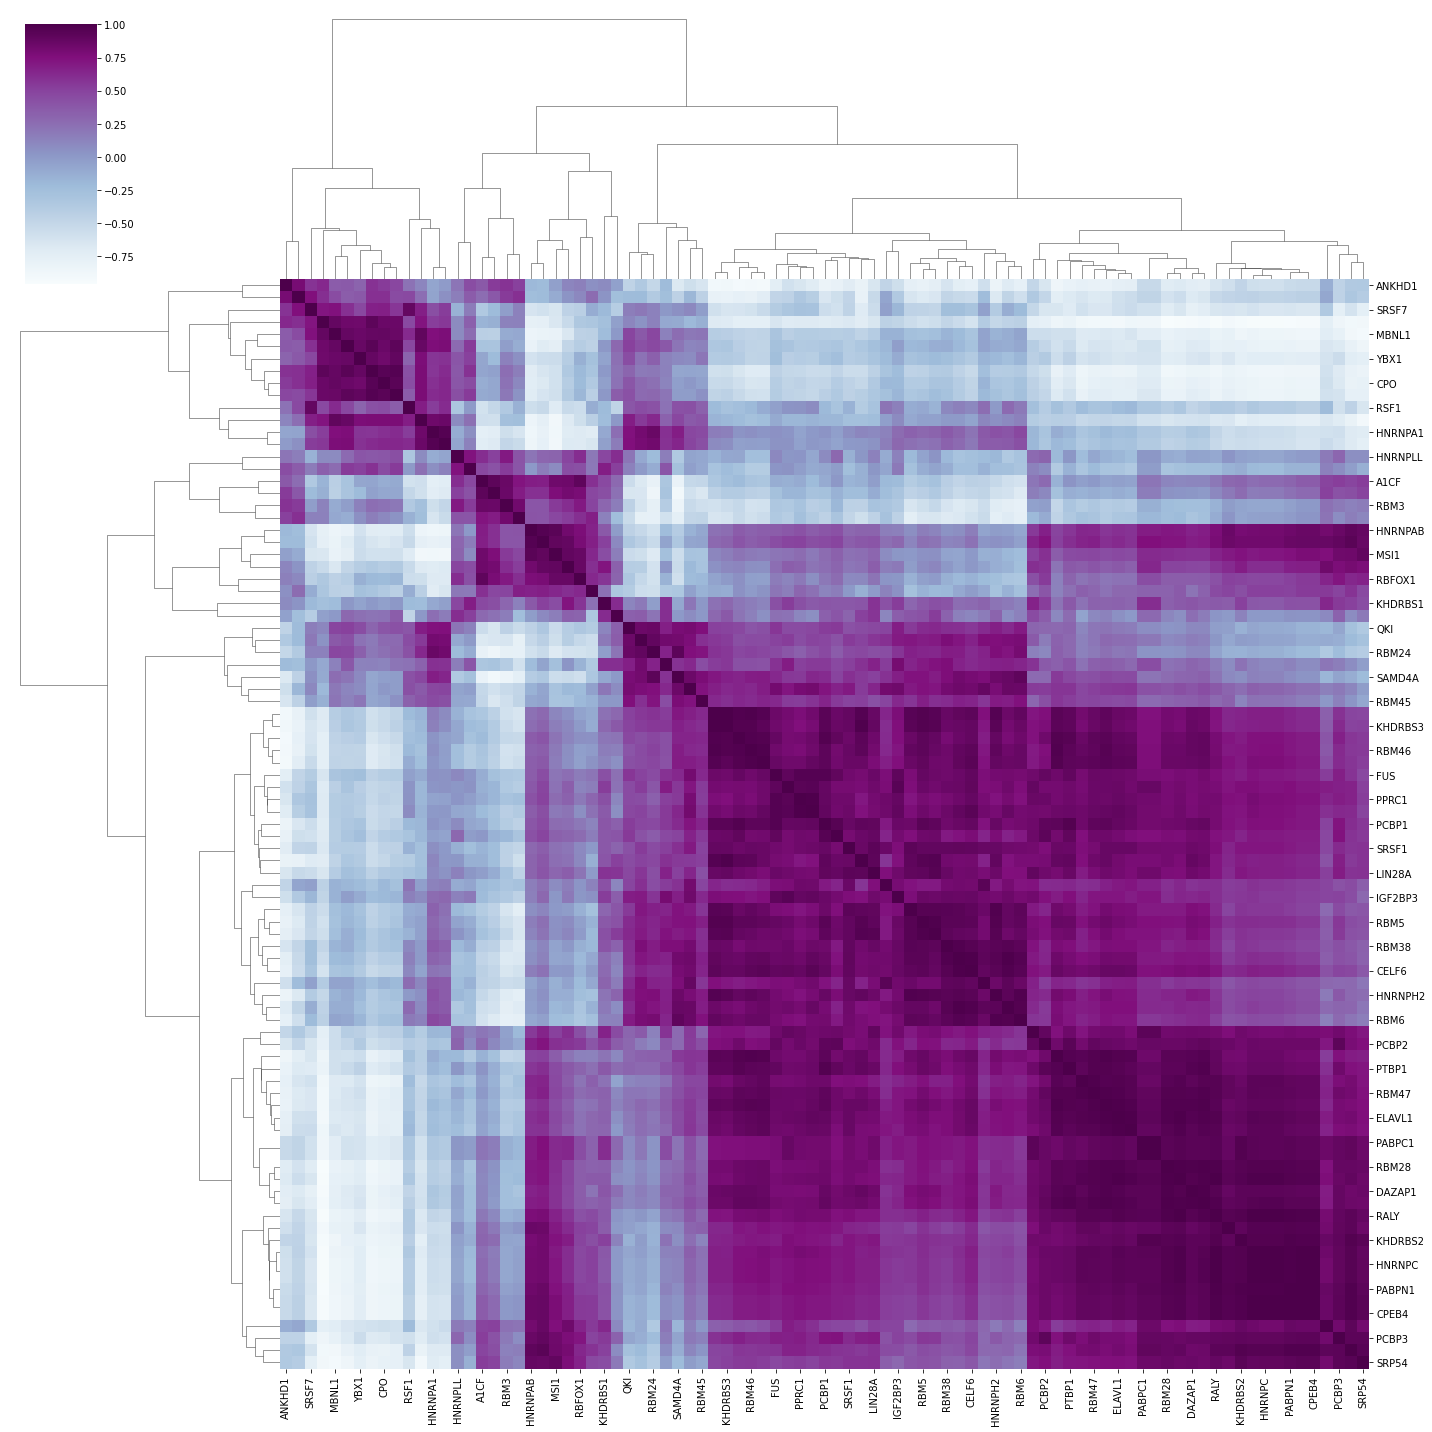

In [28]:
cluster_map = sns.clustermap(corr, cmap='BuPu', figsize=(20,20))

In [29]:
corr.to_csv('results/RBP_filter_correlation_matrix.csv')

In [30]:
'TARDBP' in corr.index

True

In [41]:
# read in the pickle file C9ALS_ct_filter_importance.pickle   
import pickle
with open('results/C9ALS_ct_filter_importance.pickle', 'rb') as f:
    ct_als_filters_imp = pickle.load(f)

with open('results/sALS_ct_filter_importance.pickle', 'rb') as f:
    sals_filters_imp = pickle.load(f)

In [42]:
celltypes = ['Excitatory', 'Inhibitory', 'Astrocytes', 'Oligodendrocytes', 'Microglia', 'OPC']

In [43]:
filters_imp = pd.DataFrame(ct_als_filters_imp[ct])
new_index_names = ['filter_{}'.format(i) for i in range(128)]
filters_imp.index = new_index_names
filters_imp

ValueError: Per-column arrays must each be 1-dimensional

In [132]:
ct_interactions = {}
for ct in celltypes:
    filter_rbps = pd.read_csv(f'results/tomtom_results/{ct}_filter_pwms.meme_res/tomtom.tsv', sep='\t')
    #   remove nan values
    filter_rbps = filter_rbps.dropna()

    filters_imp = pd.DataFrame(ct_als_filters_imp[ct])
    new_index_names = ['filter_{}'.format(i) for i in range(128)]
    filters_imp.index = new_index_names

    # Parse HTML file using BeautifulSoup
    with open(f"results/tomtom_results/{ct}_filter_pwms.meme_res/tomtom.html") as f:
        soup = BeautifulSoup(f, "html.parser")

    # Replace the file path with the path to your XML file
    xml_file = f"results/tomtom_results/{ct}_filter_pwms.meme_res/tomtom.xml"
    # Replace the file path with the path to your XML file

    # Parse the XML file
    tree = ET.parse(xml_file)

    # Find all the <motif> elements
    motif_elements = tree.findall('.//motif')

    # Extract the 'id' and 'alt' attributes and print them
    rbp_map = {}
    for motif in motif_elements:
        motif_id = motif.get('id')
        motif_alt = motif.get('alt')
        if motif_alt:
            rbp_map[motif_id] = motif_alt


    filter_rbps_dict = {}
    for index, row in filter_rbps.iterrows():
        if row['Query_ID'] in filter_rbps_dict:
            filter_rbps_dict[row['Query_ID']].append(row['Target_ID'])
        else:
            filter_rbps_dict[row['Query_ID']] = [row['Target_ID']]
    filter_rbps_dict
    for key, value in filter_rbps_dict.items():
        filter_rbps_dict[key] = list(set([rbp_map[x] for x in value]))

    beforecorrection  = ['HNRPLL', 'HuR', 'HNRNPA1','BRUNOL6', 'Nab2p','BRUNOL4', 'BRUNOL5']
    corrected_names = ['HNRNPLL', 'ELAVL1', 'HNRNPA1','CELF6', 'NAB2', 'CELF4', 'CELF5']
    # lets change the filter_rbps_dict values to corrected names,
    for key, value in filter_rbps_dict.items():
        for i, rbp in enumerate(value):
            if rbp in beforecorrection:
                value[i] = corrected_names[beforecorrection.index(rbp)]

    new_data = []

    # Iterate over each filter
    for filter_name, rbps in filter_rbps_dict.items():
        # Get the importance scores for the current filter
        imp_scores = filters_imp.loc[filter_name]
        # For each RBP that binds to this filter, duplicate the importance scores
        for rbp in rbps:
            row_data = imp_scores.to_dict()
            row_data['RBP'] = rbp
            new_data.append(row_data)

    # Create the new dataframe
    new_df = pd.DataFrame(new_data)

    # Reorder columns to have 'RBP' as the first column
    cols = ['RBP'] + [col for col in new_df.columns if col != 'RBP']
    new_df = new_df[cols]

    new_df[new_df['RBP']=='HNRNPC'].drop('RBP', axis=1).mean(axis=0)


    # Group by 'RBP' and calculate the mean for each group
    averaged_df = new_df.groupby('RBP').mean().reset_index()
    scaler = MinMaxScaler(feature_range=(0,1))
    scaled_values = scaler.fit_transform(averaged_df.iloc[:, 1:])
    averaged_df.iloc[:, 1:] = scaled_values

    averaged_df = averaged_df.set_index('RBP')
    corr = averaged_df.T.corr()

    missing_rbps = set(expressed_rbps.index) - set(averaged_df.index)
    if missing_rbps:
        for missing_rbp in missing_rbps:
            new_row = pd.Series(0, index=averaged_df.columns, name=missing_rbp)
            averaged_df = averaged_df.append(new_row)

    averaged_expressed_rbp = averaged_df.loc[expressed_rbps.index]
    corr = averaged_expressed_rbp.T.corr()

    # cluster_map = sns.clustermap(corr, cmap='BuPu', figsize=(20,20))
    ct_interactions[ct] = corr

/var/folders/g6/0pp41jb11_qfdn4yrdz4b7wm0000gn/T/ipykernel_61974/1538639375.py:87: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  averaged_df = averaged_df.append(new_row)


In [133]:
# change NAN values to 0
for ct, corr in ct_interactions.items():
    ct_interactions[ct] = ct_interactions[ct].fillna(0)

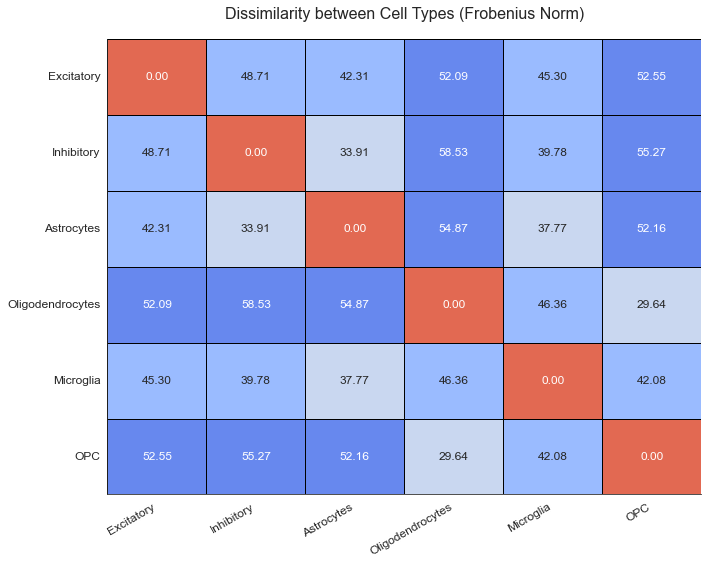

In [134]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ... (Your data preprocessing and filter_importance_ct calculation)

main_cts = ['Excitatory', 'Inhibitory', 'Astrocytes', 'Oligodendrocytes', 'Microglia', 'OPC']
# Create an empty dissimilarity matrix
num_cts = len(main_cts)
dissimilarity_matrix = np.zeros((num_cts, num_cts))

# Compute the Frobenius norm for the difference between each pair of correlation matrices
for i, ct1 in enumerate(main_cts):
    for j, ct2 in enumerate(main_cts):
        if i < j:
            diff = ct_interactions[ct1] - ct_interactions[ct2]
            frobenius_norm = np.linalg.norm(diff, 'fro')
            dissimilarity_matrix[i, j] = frobenius_norm
            dissimilarity_matrix[j, i] = frobenius_norm  # The matrix is symmetric

# Customize the style and color palette
sns.set_style("white")
cmap = sns.color_palette("coolwarm_r")

# Display the dissimilarity matrix as a heatmap
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(dissimilarity_matrix, annot=True, fmt='.2f', cmap=cmap,
            xticklabels=main_cts, yticklabels=main_cts, cbar=False, ax=ax, linewidths=0.5, linecolor='black')

# Set plot title and labels
ax.set_title("Dissimilarity between Cell Types (Frobenius Norm)", fontsize=16, pad=20)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, rotation=30, ha='right')
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)

# Customize plot appearance
plt.tight_layout()
sns.despine()

# Save the plot to a high-resolution file
plt.savefig('dissimilarity_heatmap.png', dpi=300)

plt.show()


/Users/aidensababi/opt/anaconda3/lib/python3.9/site-packages/seaborn/matrix.py:624: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


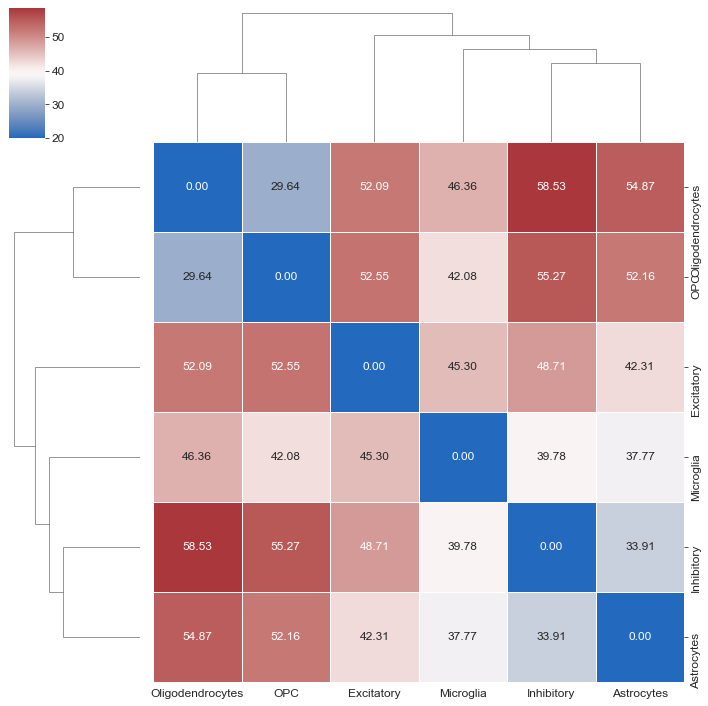

In [135]:
cmap = sns.color_palette("vlag", as_cmap=True)
sns.clustermap(dissimilarity_matrix, annot=True, fmt='.2f', cmap=cmap,
            xticklabels=main_cts, yticklabels=main_cts, cbar=True, linewidths=0.5, vmin=20)

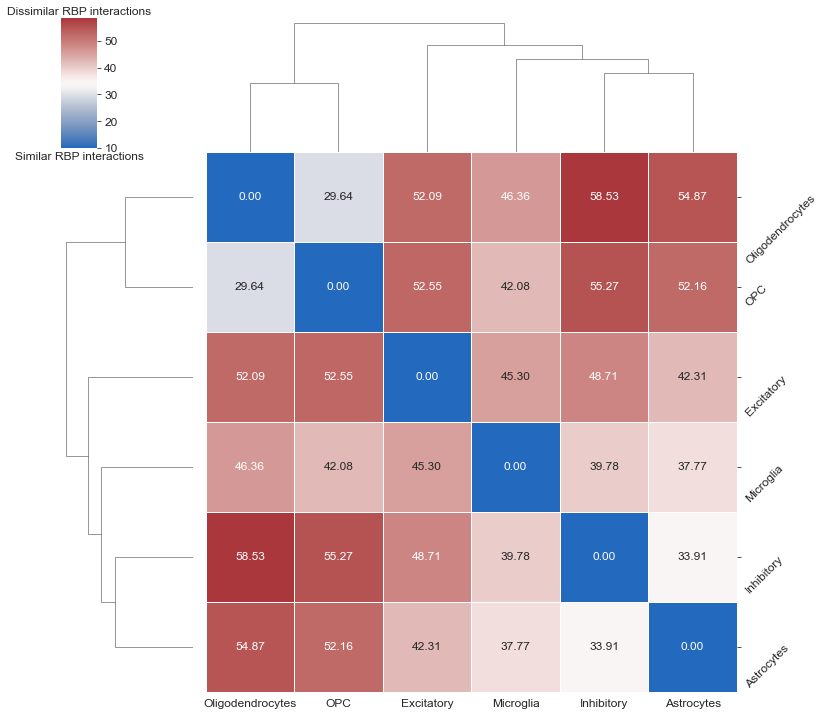

In [136]:
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 12

# Define the colormap
cmap = sns.color_palette("vlag", as_cmap=True)

# Adjust the figsize of the plot
figsize = (10, 10)  # Adjust the values as needed

# Create the clustered heatmap
g = sns.clustermap(dissimilarity_matrix, annot=True, fmt='.2f', cmap=cmap,
                   xticklabels=main_cts, yticklabels=main_cts, cbar=True, linewidths=0.5, vmin=10,
                   figsize=figsize)

# Rotate y-tick labels
plt.setp(g.ax_heatmap.get_yticklabels(), rotation=45)

# Adding text annotations for the color bar legend
plt.text(0.5, 1.05, 'Dissimilar RBP interactions', ha='center', va='center', transform=g.cax.transAxes)
plt.text(0.5, -0.07, 'Similar RBP interactions', ha='center', va='center', transform=g.cax.transAxes)

# Save the plot to a high-resolution file
plt.savefig('c9ALS_dissimilarity_heatmap.png', dpi=300, bbox_inches='tight')
# Save the plot to a high-resolution PDF
plt.savefig('c9ALS_dissimilarity_heatmap.pdf', dpi=300, bbox_inches='tight', format='pdf')

plt.show()


In [119]:
plt.show()

In [115]:
df = pd.DataFrame(dissimilarity_matrix, columns=main_cts, index=main_cts)
df.to_csv('RBP_itx_dissimilarity_matrix.csv')

In [99]:
g.cax.get_position().y1

0.98

/var/folders/g6/0pp41jb11_qfdn4yrdz4b7wm0000gn/T/ipykernel_61974/2015921842.py:87: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  averaged_df = averaged_df.append(new_row)


ValueError: The condensed distance matrix must contain only finite values.

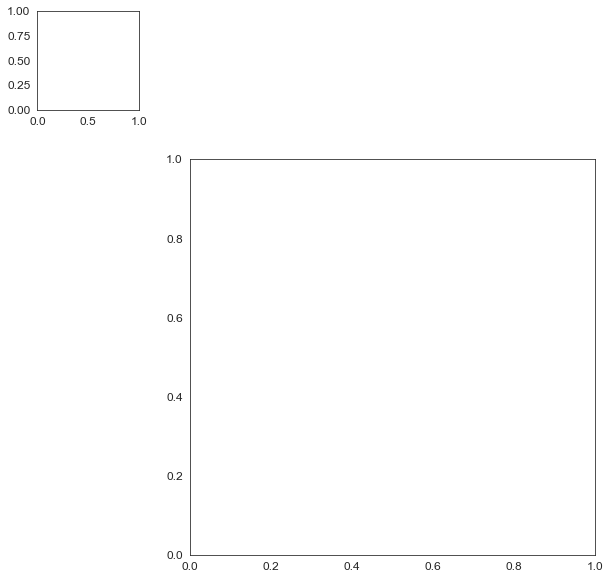

In [122]:
ct_interactions = {}
for ct in celltypes:
    filter_rbps = pd.read_csv(f'results/tomtom_results/{ct}_filter_pwms.meme_res/tomtom.tsv', sep='\t')
    #   remove nan values
    filter_rbps = filter_rbps.dropna()

    filters_imp = pd.DataFrame(sals_filters_imp[ct])
    new_index_names = ['filter_{}'.format(i) for i in range(128)]
    filters_imp.index = new_index_names

    # Parse HTML file using BeautifulSoup
    with open(f"results/tomtom_results/{ct}_filter_pwms.meme_res/tomtom.html") as f:
        soup = BeautifulSoup(f, "html.parser")

    # Replace the file path with the path to your XML file
    xml_file = f"results/tomtom_results/{ct}_filter_pwms.meme_res/tomtom.xml"
    # Replace the file path with the path to your XML file

    # Parse the XML file
    tree = ET.parse(xml_file)

    # Find all the <motif> elements
    motif_elements = tree.findall('.//motif')

    # Extract the 'id' and 'alt' attributes and print them
    rbp_map = {}
    for motif in motif_elements:
        motif_id = motif.get('id')
        motif_alt = motif.get('alt')
        if motif_alt:
            rbp_map[motif_id] = motif_alt


    filter_rbps_dict = {}
    for index, row in filter_rbps.iterrows():
        if row['Query_ID'] in filter_rbps_dict:
            filter_rbps_dict[row['Query_ID']].append(row['Target_ID'])
        else:
            filter_rbps_dict[row['Query_ID']] = [row['Target_ID']]
    filter_rbps_dict
    for key, value in filter_rbps_dict.items():
        filter_rbps_dict[key] = list(set([rbp_map[x] for x in value]))

    beforecorrection  = ['HNRPLL', 'HuR', 'HNRNPA1','BRUNOL6', 'Nab2p','BRUNOL4', 'BRUNOL5']
    corrected_names = ['HNRNPLL', 'ELAVL1', 'HNRNPA1','CELF6', 'NAB2', 'CELF4', 'CELF5']
    # lets change the filter_rbps_dict values to corrected names,
    for key, value in filter_rbps_dict.items():
        for i, rbp in enumerate(value):
            if rbp in beforecorrection:
                value[i] = corrected_names[beforecorrection.index(rbp)]

    new_data = []

    # Iterate over each filter
    for filter_name, rbps in filter_rbps_dict.items():
        # Get the importance scores for the current filter
        imp_scores = filters_imp.loc[filter_name]
        # For each RBP that binds to this filter, duplicate the importance scores
        for rbp in rbps:
            row_data = imp_scores.to_dict()
            row_data['RBP'] = rbp
            new_data.append(row_data)

    # Create the new dataframe
    new_df = pd.DataFrame(new_data)

    # Reorder columns to have 'RBP' as the first column
    cols = ['RBP'] + [col for col in new_df.columns if col != 'RBP']
    new_df = new_df[cols]

    new_df[new_df['RBP']=='HNRNPC'].drop('RBP', axis=1).mean(axis=0)


    # Group by 'RBP' and calculate the mean for each group
    averaged_df = new_df.groupby('RBP').mean().reset_index()
    scaler = MinMaxScaler(feature_range=(0,1))
    scaled_values = scaler.fit_transform(averaged_df.iloc[:, 1:])
    averaged_df.iloc[:, 1:] = scaled_values

    averaged_df = averaged_df.set_index('RBP')
    corr = averaged_df.T.corr()

    missing_rbps = set(expressed_rbps.index) - set(averaged_df.index)
    if missing_rbps:
        for missing_rbp in missing_rbps:
            new_row = pd.Series(0, index=averaged_df.columns, name=missing_rbp)
            averaged_df = averaged_df.append(new_row)

    averaged_expressed_rbp = averaged_df.loc[expressed_rbps.index]
    corr = averaged_expressed_rbp.T.corr()

    # cluster_map = sns.clustermap(corr, cmap='BuPu', figsize=(20,20))
    ct_interactions[ct] = corr



main_cts = ['Excitatory', 'Inhibitory', 'Astrocytes', 'Oligodendrocytes', 'Microglia', 'OPC']





/Users/aidensababi/opt/anaconda3/lib/python3.9/site-packages/seaborn/matrix.py:624: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
/var/folders/g6/0pp41jb11_qfdn4yrdz4b7wm0000gn/T/ipykernel_61974/2229128018.py:40: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "width" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('sALS_dissimilarity_heatmap.pdf', dpi=300, bbox_inches='tight', format='pdf', width=10, height=8)
/var/folders/g6/0pp41jb11_qfdn4yrdz4b7wm0000gn/T/ipykernel_61974/2229128018.py:40: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "height" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('sALS_dissimilarity_heatmap.pdf', dpi=300, bbox_inches='tight', format='pdf', width=10, height=8)


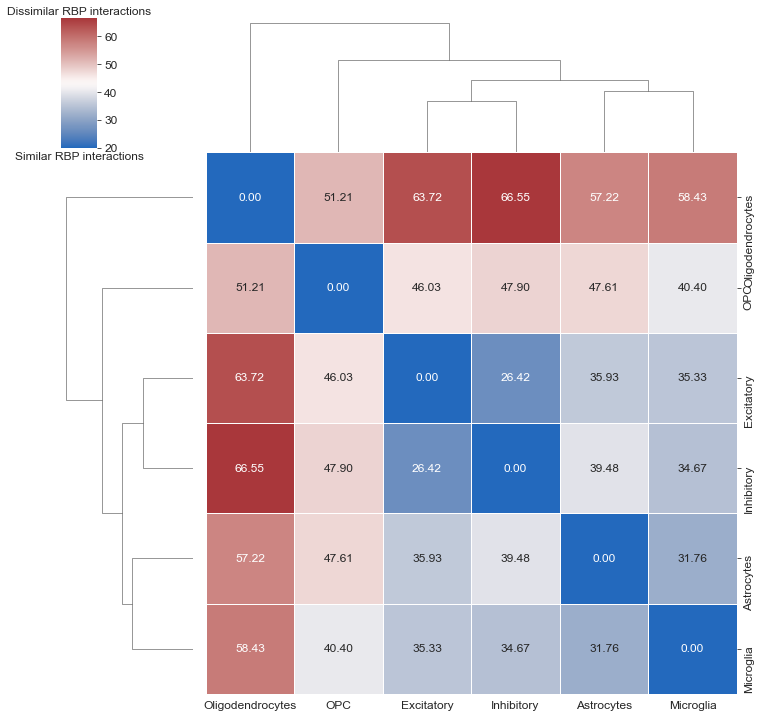

In [124]:
# change NAN values to 0
for ct, corr in ct_interactions.items():
    ct_interactions[ct] = ct_interactions[ct].fillna(0)



# Create an empty dissimilarity matrix
num_cts = len(main_cts)
dissimilarity_matrix = np.zeros((num_cts, num_cts))

# Compute the Frobenius norm for the difference between each pair of correlation matrices
for i, ct1 in enumerate(main_cts):
    for j, ct2 in enumerate(main_cts):
        if i < j:
            diff = ct_interactions[ct1] - ct_interactions[ct2]
            frobenius_norm = np.linalg.norm(diff, 'fro')
            dissimilarity_matrix[i, j] = frobenius_norm
            dissimilarity_matrix[j, i] = frobenius_norm  

/Users/aidensababi/opt/anaconda3/lib/python3.9/site-packages/seaborn/matrix.py:624: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


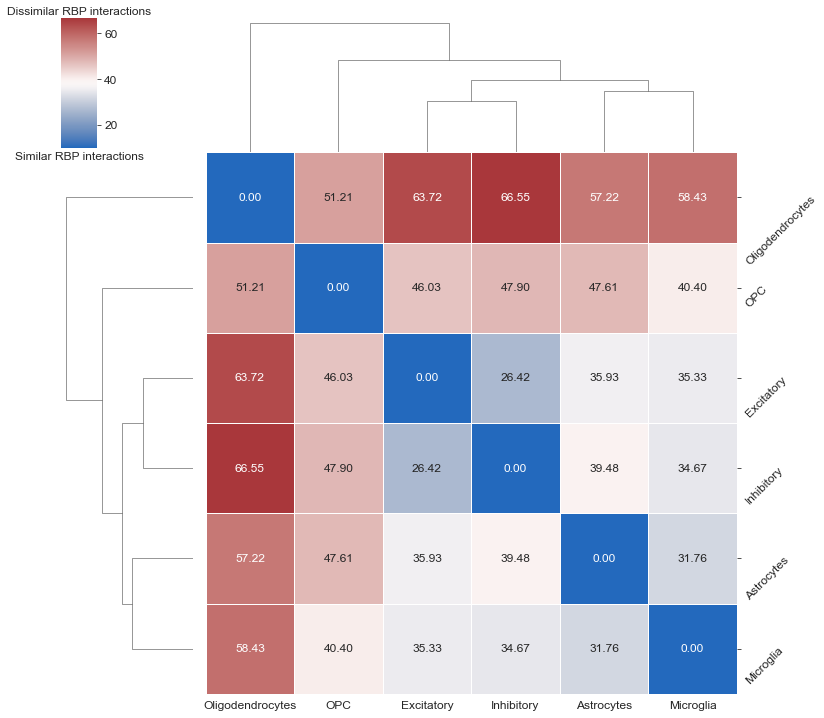

In [128]:
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 12

# Define the colormap
cmap = sns.color_palette("vlag", as_cmap=True)

# Adjust the figsize of the plot
figsize = (10, 10)  # Adjust the values as needed

# Create the clustered heatmap
g = sns.clustermap(dissimilarity_matrix, annot=True, fmt='.2f', cmap=cmap,
                   xticklabels=main_cts, yticklabels=main_cts, cbar=True, linewidths=0.5, vmin=10,
                   figsize=figsize)

# Rotate y-tick labels
plt.setp(g.ax_heatmap.get_yticklabels(), rotation=45)

# Adding text annotations for the color bar legend
plt.text(0.5, 1.05, 'Dissimilar RBP interactions', ha='center', va='center', transform=g.cax.transAxes)
plt.text(0.5, -0.07, 'Similar RBP interactions', ha='center', va='center', transform=g.cax.transAxes)

# Save the plot to a high-resolution file
plt.savefig('sALS_dissimilarity_heatmap.png', dpi=300, bbox_inches='tight')
# Save the plot to a high-resolution PDF
plt.savefig('sALS_dissimilarity_heatmap.pdf', dpi=300, bbox_inches='tight', format='pdf')

plt.show()


## RBP interaction for sALS

In [140]:
filter_rbps = pd.read_csv('results/sALS_tomtom_results/sALS_all_Cells_filter_pwms.meme_res/tomtom.tsv', sep='\t')
# remove nan values
filter_rbps = filter_rbps.dropna()
filters_imp = pd.read_csv('sALS_filter_importance_128_by_160.csv', index_col=0)


In [141]:
# Parse HTML file using BeautifulSoup
with open("results/sALS_tomtom_results/sALS_all_Cells_filter_pwms.meme_res/tomtom.html") as f:
    soup = BeautifulSoup(f, "html.parser")

import xml.etree.ElementTree as ET

# Replace the file path with the path to your XML file
xml_file = "results/sALS_tomtom_results/sALS_all_Cells_filter_pwms.meme_res/tomtom.xml"
# Replace the file path with the path to your XML file

# Parse the XML file
tree = ET.parse(xml_file)

# Find all the <motif> elements
motif_elements = tree.findall('.//motif')

# Extract the 'id' and 'alt' attributes and print them
rbp_map = {}
for motif in motif_elements:
    motif_id = motif.get('id')
    motif_alt = motif.get('alt')
    if motif_alt:
        rbp_map[motif_id] = motif_alt


filter_rbps_dict = {}
for index, row in filter_rbps.iterrows():
    if row['Query_ID'] in filter_rbps_dict:
        filter_rbps_dict[row['Query_ID']].append(row['Target_ID'])
    else:
        filter_rbps_dict[row['Query_ID']] = [row['Target_ID']]
filter_rbps_dict
for key, value in filter_rbps_dict.items():
    filter_rbps_dict[key] = list(set([rbp_map[x] for x in value]))

In [142]:
beforecorrection  = ['HNRPLL', 'HuR', 'HNRNPA1','BRUNOL6', 'Nab2p','BRUNOL4', 'BRUNOL5']
corrected_names = ['HNRNPLL', 'ELAVL1', 'HNRNPA1','CELF6', 'NAB2', 'CELF4', 'CELF5']
# lets change the filter_rbps_dict values to corrected names,
for key, value in filter_rbps_dict.items():
    for i, rbp in enumerate(value):
        if rbp in beforecorrection:
            value[i] = corrected_names[beforecorrection.index(rbp)]
# Initialize an empty list to store data
new_data = []

# Iterate over each filter
for filter_name, rbps in filter_rbps_dict.items():
    # Get the importance scores for the current filter
    imp_scores = filters_imp.loc[filter_name]
    # For each RBP that binds to this filter, duplicate the importance scores
    for rbp in rbps:
        row_data = imp_scores.to_dict()
        row_data['RBP'] = rbp
        new_data.append(row_data)

# Create the new dataframe
new_df = pd.DataFrame(new_data)

# Reorder columns to have 'RBP' as the first column
cols = ['RBP'] + [col for col in new_df.columns if col != 'RBP']
new_df = new_df[cols]

# Now new_df contains the importance scores duplicated for each RBP that binds to each filter
new_df


,RBP,0,1,2,3,4,5,6,7,8,...,150,151,152,153,154,155,156,157,158,159
0,CG5213,0.000015,0.000011,0.000011,0.000011,0.000010,0.000011,0.000010,0.000012,0.000012,...,0.000012,0.000011,0.000011,0.000014,0.000017,0.000013,0.000014,0.000017,0.000014,0.000014
1,RBM3,0.000015,0.000011,0.000011,0.000011,0.000010,0.000011,0.000010,0.000012,0.000012,...,0.000012,0.000011,0.000011,0.000014,0.000017,0.000013,0.000014,0.000017,0.000014,0.000014
2,CELF6,0.000384,0.000359,0.000362,0.000356,0.000359,0.000359,0.000356,0.000359,0.000362,...,0.000357,0.000360,0.000359,0.000362,0.000363,0.000364,0.000362,0.000360,0.000359,0.000376
3,ZC3H10,0.000384,0.000359,0.000362,0.000356,0.000359,0.000359,0.000356,0.000359,0.000362,...,0.000357,0.000360,0.000359,0.000362,0.000363,0.000364,0.000362,0.000360,0.000359,0.000376
4,CG33714,0.000384,0.000359,0.000362,0.000356,0.000359,0.000359,0.000356,0.000359,0.000362,...,0.000357,0.000360,0.000359,0.000362,0.000363,0.000364,0.000362,0.000360,0.000359,0.000376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1375,CELF5,0.000034,0.000026,0.000025,0.000026,0.000026,0.000026,0.000024,0.000023,0.000026,...,0.000024,0.000024,0.000024,0.000025,0.000027,0.000027,0.000025,0.000026,0.000026,0.000031
1376,FNE,0.000034,0.000026,0.000025,0.000026,0.000026,0.000026,0.000024,0.000023,0.000026,...,0.000024,0.000024,0.000024,0.000025,0.000027,0.000027,0.000025,0.000026,0.000026,0.000031
1377,Tv_0258,0.000034,0.000026,0.000025,0.000026,0.000026,0.000026,0.000024,0.000023,0.000026,...,0.000024,0.000024,0.000024,0.000025,0.000027,0.000027,0.000025,0.000026,0.000026,0.000031
1378,UNC-75,0.000034,0.000026,0.000025,0.000026,0.000026,0.000026,0.000024,0.000023,0.000026,...,0.000024,0.000024,0.000024,0.000025,0.000027,0.000027,0.000025,0.000026,0.000026,0.000031


In [149]:
averaged_df = new_df.groupby('RBP').mean().reset_index()
scaler = MinMaxScaler(feature_range=(0,1))
scaled_values = scaler.fit_transform(averaged_df.iloc[:, 1:])
averaged_df.iloc[:, 1:] = scaled_values
averaged_df

,RBP,0,1,2,3,4,5,6,7,8,...,150,151,152,153,154,155,156,157,158,159
0,A1CF,0.301440,0.293482,0.294318,0.290042,0.291518,0.293755,0.292525,0.293567,0.295366,...,0.291613,0.291685,0.292079,0.296024,0.292282,0.294629,0.291524,0.291977,0.292597,0.299927
1,A2BP1,0.122810,0.118698,0.120313,0.117525,0.116445,0.118090,0.119760,0.120315,0.119798,...,0.120056,0.120487,0.116601,0.118306,0.119743,0.121881,0.118590,0.121491,0.123003,0.118958
2,ANKHD1,0.469193,0.450635,0.451593,0.445337,0.447853,0.451835,0.451089,0.453871,0.455621,...,0.445202,0.444890,0.448898,0.453298,0.447327,0.450063,0.445742,0.449306,0.446995,0.465168
3,ARET,0.188202,0.179704,0.179733,0.177359,0.178577,0.180785,0.179737,0.180491,0.182583,...,0.178160,0.177022,0.177509,0.180448,0.176979,0.179832,0.174916,0.179520,0.179166,0.186704
4,ASD-1,0.214063,0.198788,0.200114,0.198071,0.196584,0.202337,0.201280,0.201468,0.205205,...,0.195497,0.196604,0.195868,0.200018,0.197583,0.199910,0.197306,0.201052,0.202280,0.208519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,YBX2,0.368440,0.371249,0.371503,0.373361,0.372856,0.374280,0.380250,0.375291,0.368727,...,0.369289,0.370110,0.368979,0.363450,0.359093,0.364295,0.360371,0.366242,0.367186,0.367682
195,ZC3H10,0.272456,0.261804,0.260279,0.260081,0.261489,0.264486,0.264135,0.261850,0.264452,...,0.257612,0.255376,0.259617,0.263584,0.257621,0.258803,0.255791,0.261686,0.259798,0.274061
196,ZC3H14,0.165485,0.153571,0.154375,0.150223,0.152410,0.155446,0.153809,0.154147,0.155374,...,0.149244,0.149223,0.151628,0.153719,0.148180,0.151874,0.147510,0.150574,0.149815,0.162882
197,ZCRB1,0.560782,0.547860,0.548809,0.541813,0.542370,0.544613,0.539628,0.543157,0.552155,...,0.547605,0.542202,0.548683,0.556425,0.552659,0.553307,0.550666,0.547075,0.546938,0.560458


In [150]:
averaged_df = averaged_df.set_index('RBP')
corr = averaged_df.T.corr()
averaged_expressed_rbp = averaged_df.loc[expressed_rbps.index]
corr = averaged_expressed_rbp.T.corr()
corr

,A1CF,ANKHD1,CELF4,CELF5,CELF6,CNOT4,CPEB2,CPEB4,CPO,DAZAP1,...,TARDBP,TIA1,TUT1,U2AF2,YBX1,YBX2,ZC3H10,ZC3H14,ZCRB1,ZNF638
A1CF,1.000000,0.929685,0.882834,0.882834,0.923296,0.938289,0.811129,0.589269,0.920092,0.339404,...,-0.402351,0.659750,0.609093,0.683279,0.700245,-0.154665,0.871960,0.818907,0.811694,0.882515
ANKHD1,0.929685,1.000000,0.959010,0.959010,0.975191,0.868032,0.944420,0.791400,0.837386,0.596489,...,-0.201579,0.842213,0.702069,0.862589,0.878459,0.135061,0.957390,0.949904,0.635117,0.952714
CELF4,0.882834,0.959010,1.000000,1.000000,0.967163,0.835651,0.959519,0.841176,0.807422,0.682576,...,-0.195562,0.893365,0.736180,0.919689,0.933009,0.234701,0.977564,0.967656,0.567122,0.975463
CELF5,0.882834,0.959010,1.000000,1.000000,0.967163,0.835651,0.959519,0.841176,0.807422,0.682576,...,-0.195562,0.893365,0.736180,0.919689,0.933009,0.234701,0.977564,0.967656,0.567122,0.975463
CELF6,0.923296,0.975191,0.967163,0.967163,1.000000,0.900099,0.926325,0.751569,0.879374,0.577534,...,-0.282315,0.819707,0.624612,0.845614,0.877671,0.083301,0.978698,0.941697,0.680706,0.984086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YBX2,-0.154665,0.135061,0.234701,0.234701,0.083301,-0.308710,0.416375,0.687745,-0.341206,0.848895,...,0.684560,0.609650,0.323297,0.582070,0.529931,1.000000,0.193689,0.395542,-0.646885,0.144456
ZC3H10,0.871960,0.957390,0.977564,0.977564,0.978698,0.865111,0.936921,0.790355,0.848376,0.671001,...,-0.296123,0.849208,0.640080,0.897622,0.928635,0.193689,1.000000,0.948964,0.609927,0.991268
ZC3H14,0.818907,0.949904,0.967656,0.967656,0.941697,0.725666,0.995580,0.928045,0.689226,0.792687,...,-0.001059,0.960900,0.719209,0.964922,0.969222,0.395542,0.948964,1.000000,0.416132,0.939518
ZCRB1,0.811694,0.635117,0.567122,0.567122,0.680706,0.917917,0.392006,0.061348,0.932498,-0.166591,...,-0.785154,0.166982,0.215602,0.223434,0.284106,-0.646885,0.609927,0.416132,1.000000,0.644279


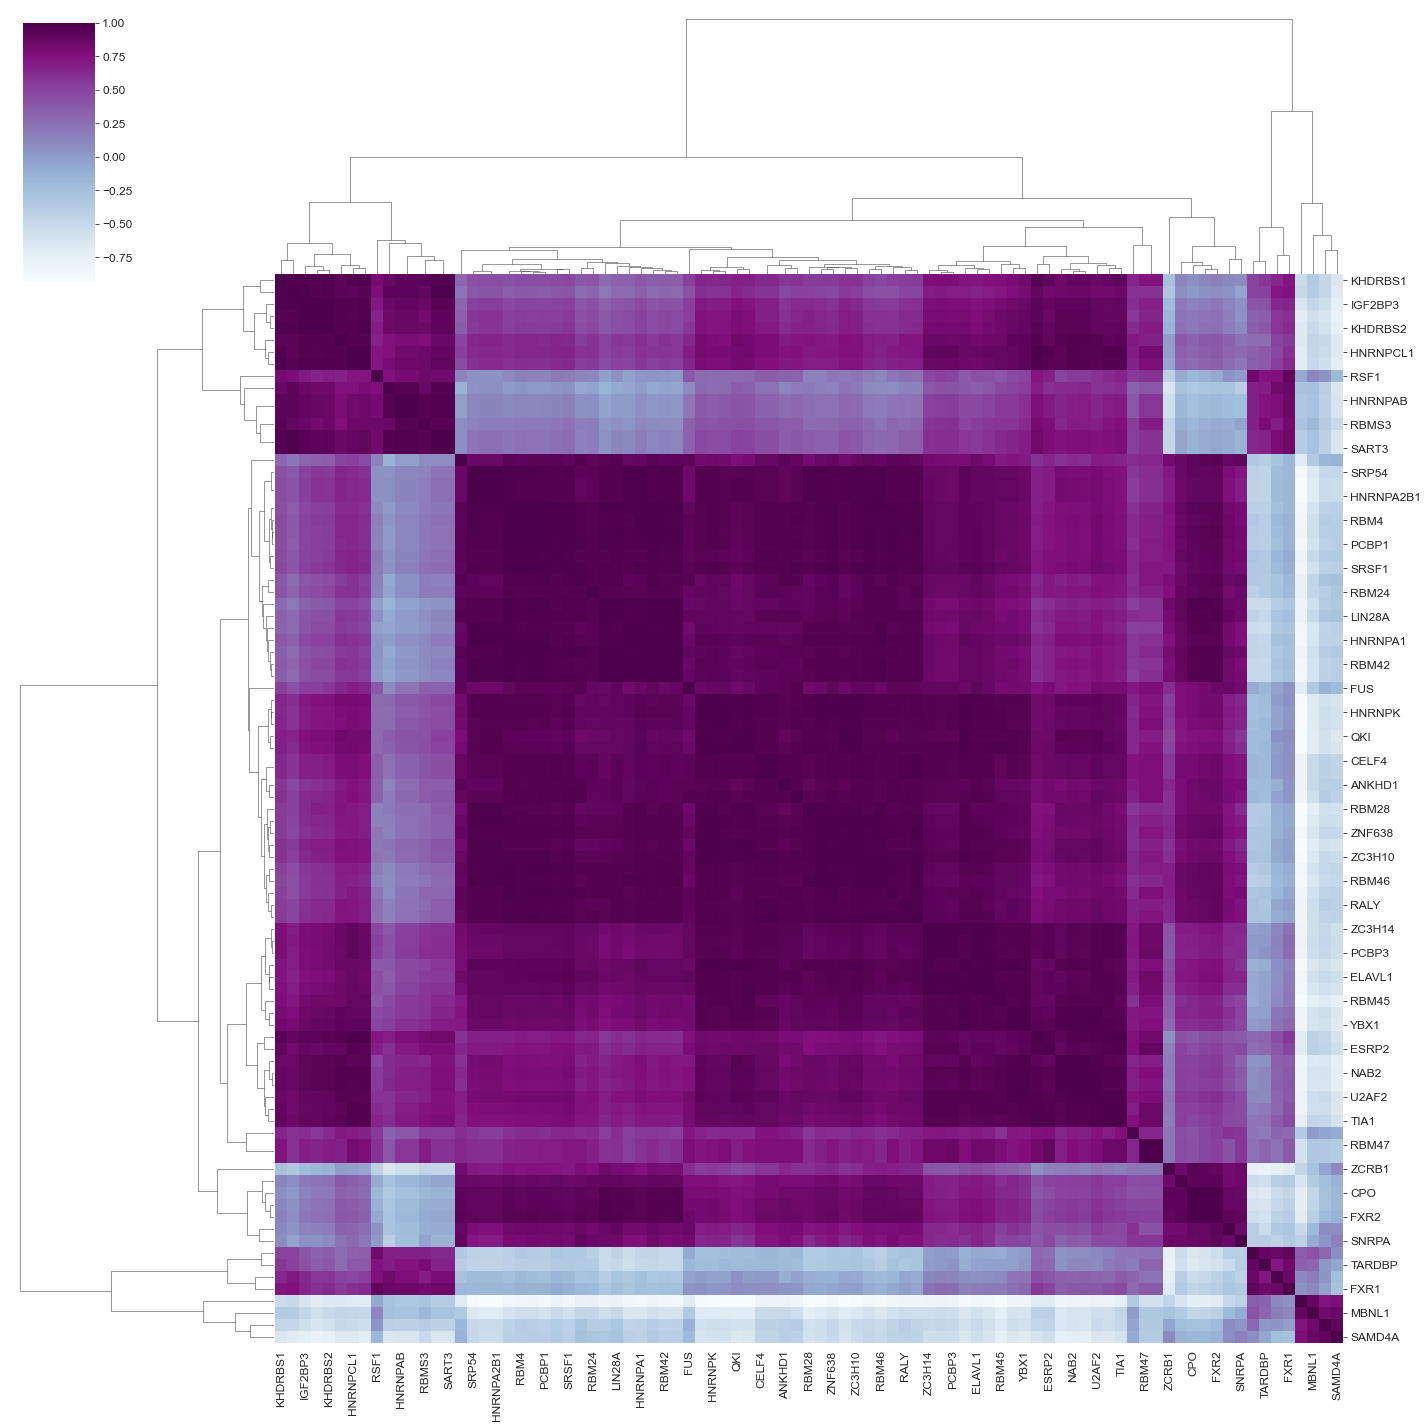

In [151]:
cluster_map = sns.clustermap(corr, cmap='BuPu', figsize=(20,20))

In [152]:
corr.to_csv('results/sALS_RBP_filter_correlation_matrix.csv')